In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import Adam

In [35]:
pre_df = pd.read_csv(r"C:\Users\Jenna\OneDrive\Documents\NFL-Big-Data-Bowl-2026\data\train\input_2023_w09.csv")
post_df = pd.read_csv(r"C:\Users\Jenna\OneDrive\Documents\NFL-Big-Data-Bowl-2026\data\train\output_2023_w09.csv")
kohou_pre_filter = pre_df[
    (pre_df['player_name'] == 'Kader Kohou') & (pre_df['play_id'] == 55)
]

# Use the .head() method to display the first few rows of the filtered DataFrame
kohou_pre_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 17211 to 17248
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   game_id                   38 non-null     int64  
 1   play_id                   38 non-null     int64  
 2   player_to_predict         38 non-null     bool   
 3   nfl_id                    38 non-null     int64  
 4   frame_id                  38 non-null     int64  
 5   play_direction            38 non-null     object 
 6   absolute_yardline_number  38 non-null     int64  
 7   player_name               38 non-null     object 
 8   player_height             38 non-null     object 
 9   player_weight             38 non-null     int64  
 10  player_birth_date         38 non-null     object 
 11  player_position           38 non-null     object 
 12  player_side               38 non-null     object 
 13  player_role               38 non-null     object 
 14  x         

In [ ]:
# BIG PROBLEM

df_combined = pre_df.merge(
    post_df,
    on=["game_id", "play_id", "nfl_id"],
    suffixes=("_pre", "_post")
)

## start wth just one game to test
# df_combined = df_combined[df_combined['game_id'] == 2023110500]
df_combined = df_combined[df_combined['play_id'] == 55]
df_combined = df_combined[df_combined['player_name'] == 'Kader Kohou']

df_combined

,game_id,play_id,player_to_predict,nfl_id,frame_id_pre,play_direction,absolute_yardline_number,player_name,player_height,player_weight,...,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y,frame_id_post,x_post,y_post
63308,2023110500,55,True,54936,1,right,35,Kader Kohou,5-9,187,...,1.22,1.37,10.24,294.41,13,50.720001,39.790001,1,46.98,24.86
63309,2023110500,55,True,54936,1,right,35,Kader Kohou,5-9,187,...,1.22,1.37,10.24,294.41,13,50.720001,39.790001,2,47.46,25.01
63310,2023110500,55,True,54936,1,right,35,Kader Kohou,5-9,187,...,1.22,1.37,10.24,294.41,13,50.720001,39.790001,3,47.95,25.21
63311,2023110500,55,True,54936,1,right,35,Kader Kohou,5-9,187,...,1.22,1.37,10.24,294.41,13,50.720001,39.790001,4,48.44,25.47
63312,2023110500,55,True,54936,1,right,35,Kader Kohou,5-9,187,...,1.22,1.37,10.24,294.41,13,50.720001,39.790001,5,48.93,25.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63797,2023110500,55,True,54936,38,right,35,Kader Kohou,5-9,187,...,4.75,2.54,81.28,1.61,13,50.720001,39.790001,9,50.78,27.48
63798,2023110500,55,True,54936,38,right,35,Kader Kohou,5-9,187,...,4.75,2.54,81.28,1.61,13,50.720001,39.790001,10,51.22,28.02
63799,2023110500,55,True,54936,38,right,35,Kader Kohou,5-9,187,...,4.75,2.54,81.28,1.61,13,50.720001,39.790001,11,51.65,28.59
63800,2023110500,55,True,54936,38,right,35,Kader Kohou,5-9,187,...,4.75,2.54,81.28,1.61,13,50.720001,39.790001,12,52.07,29.19


In [36]:
# isolating 1 player to test frame_id merging logic
GAME_ID_TEST = 2023110500 # Assuming this is the game ID for play 55 based on file name
PLAY_ID_TEST = 55
PLAYER_NAME_TEST = 54936  # Kader Kohou's NFL ID

pre_df = pre_df[
    (pre_df['play_id'] == PLAY_ID_TEST) & 
    (pre_df['nfl_id'] == PLAYER_NAME_TEST) &
    (pre_df['game_id'] == GAME_ID_TEST)
].copy()

post_df = post_df[
    (post_df['play_id'] == PLAY_ID_TEST) & 
    (post_df['nfl_id'] == PLAYER_NAME_TEST) &
    (post_df['game_id'] == GAME_ID_TEST)
].copy()

# Confirm we have the right counts before merge
print(f"Rows in pre_df (filtered): {len(pre_df)}")
print(f"Rows in post_df (filtered): {len(post_df)}")

# 2. Calculate the offset and apply it to the POST data

# We only need the max frame_id for THIS specific filtered set now
frame_offset = pre_df['frame_id'].max()

# Add the offset to the post_df's frame_id to create an absolute frame ID
# The first frame in post_df starts at 1, so offset + current_frame_id works
post_df['frame_id'] = frame_offset + post_df['frame_id']

# Rename the column in both dataframes to match your desired output name before stacking
pre_df = pre_df.rename(columns={"frame_id": "frame_id_total"})
post_df = post_df.rename(columns={"frame_id": "frame_id_total"})

# 3. Combine vertically
df_combined_total = pd.concat([pre_df, post_df], ignore_index=True)

print(f"Total combined rows for Kader Kohou (Play 55): {len(df_combined_total)}")

# Display the result
df_combined_total.head()


Rows in pre_df (filtered): 38
Rows in post_df (filtered): 13
Total combined rows for Kader Kohou (Play 55): 51


,game_id,play_id,player_to_predict,nfl_id,frame_id_total,play_direction,absolute_yardline_number,player_name,player_height,player_weight,...,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
0,2023110500,55,True,54936,1,right,35.0,Kader Kohou,5-9,187.0,...,Defensive Coverage,39.89,23.94,1.22,1.37,10.24,294.41,13.0,50.720001,39.790001
1,2023110500,55,True,54936,2,right,35.0,Kader Kohou,5-9,187.0,...,Defensive Coverage,39.91,24.05,1.01,1.60,10.04,293.17,13.0,50.720001,39.790001
2,2023110500,55,True,54936,3,right,35.0,Kader Kohou,5-9,187.0,...,Defensive Coverage,39.93,24.12,0.74,1.85,11.75,291.37,13.0,50.720001,39.790001
3,2023110500,55,True,54936,4,right,35.0,Kader Kohou,5-9,187.0,...,Defensive Coverage,39.94,24.18,0.51,1.91,13.26,288.75,13.0,50.720001,39.790001
4,2023110500,55,True,54936,5,right,35.0,Kader Kohou,5-9,187.0,...,Defensive Coverage,39.95,24.23,0.33,1.76,16.62,286.05,13.0,50.720001,39.790001


In [40]:
import pandas as pd

# Load the raw data again to ensure a clean start
pre_df = pd.read_csv(r"C:\Users\Jenna\OneDrive\Documents\NFL-Big-Data-Bowl-2026\data\train\input_2023_w09.csv")
post_df = pd.read_csv(r"C:\Users\Jenna\OneDrive\Documents\NFL-Big-Data-Bowl-2026\data\train\output_2023_w09.csv")

# Filter for just one play to test all players on that play
GAME_ID_TEST = 2023110500
PLAY_ID_TEST = 55

pre_play_df = pre_df[(pre_df['game_id'] == GAME_ID_TEST) & (pre_df['play_id'] == PLAY_ID_TEST)].copy()
post_play_df = post_df[(post_df['game_id'] == GAME_ID_TEST) & (post_df['play_id'] == PLAY_ID_TEST)].copy()

# 1. Calculate the offset for *each player* within the test play
offset_df = pre_play_df.groupby(["game_id", "play_id", "nfl_id"])["frame_id"].max().reset_index()
offset_df = offset_df.rename(columns={"frame_id": "frame_id_offset"})

# 2. Add the offset to the POST data and calculate total ID
post_play_df = post_play_df.merge(offset_df, on=["game_id", "play_id", "nfl_id"], how="left")
post_play_df["frame_id_total"] = post_play_df["frame_id_offset"] + post_play_df["frame_id"]

# 3. Prepare both dataframes for concatenation
pre_play_df = pre_play_df.rename(columns={"frame_id": "frame_id_total"})
pre_play_df = pre_play_df.drop(columns=['num_frames_output'], errors='ignore') # Drop pre-data specific columns if needed
post_play_df = post_play_df.drop(columns=["frame_id_offset", "frame_id"], errors='ignore') # Drop temporary and original frame_id

# 4. Concatenate vertically
df_combined_total = pd.concat([pre_play_df, post_play_df], ignore_index=True)

# 5. Verify the results
print(f"Total rows for play {PLAY_ID_TEST}: {len(df_combined_total)}")
# Verify number of players
print(f"Number of players in combined dataframe: {df_combined_total['nfl_id'].nunique()}")

# # Optional: Verify the first few rows for Kader Kohou (or any specific player)
# kader_kohou_combined = df_combined_total[df_combined_total['nfl_id'] == 54936]
# print("\nKader Kohou's data combined:")
# print(kader_kohou_combined[['nfl_id', 'frame_id_total']].head(2))
# print(kader_kohou_combined[['nfl_id', 'frame_id_total']].tail(2))
df_combined_total


Total rows for play 55: 547
Number of players in combined dataframe: 12


,game_id,play_id,player_to_predict,nfl_id,frame_id_total,play_direction,absolute_yardline_number,player_name,player_height,player_weight,...,player_side,player_role,x,y,s,a,dir,o,ball_land_x,ball_land_y
0,2023110500,55,True,47971,1,right,35.0,David Long Jr.,5-11,224.0,...,Defense,Defensive Coverage,38.88,27.85,1.07,0.72,351.73,281.25,50.720001,39.790001
1,2023110500,55,True,47971,2,right,35.0,David Long Jr.,5-11,224.0,...,Defense,Defensive Coverage,38.87,27.96,1.14,0.40,350.15,280.56,50.720001,39.790001
2,2023110500,55,True,47971,3,right,35.0,David Long Jr.,5-11,224.0,...,Defense,Defensive Coverage,38.84,28.08,1.24,0.67,344.46,280.56,50.720001,39.790001
3,2023110500,55,True,47971,4,right,35.0,David Long Jr.,5-11,224.0,...,Defense,Defensive Coverage,38.80,28.21,1.38,0.87,342.43,277.82,50.720001,39.790001
4,2023110500,55,True,47971,5,right,35.0,David Long Jr.,5-11,224.0,...,Defense,Defensive Coverage,38.75,28.35,1.56,1.29,335.95,277.82,50.720001,39.790001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,2023110500,55,NaN,46243,47,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,48.01,39.13,NaN,NaN,NaN,NaN,NaN,NaN
543,2023110500,55,NaN,46243,48,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,48.68,39.26,NaN,NaN,NaN,NaN,NaN,NaN
544,2023110500,55,NaN,46243,49,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,49.33,39.39,NaN,NaN,NaN,NaN,NaN,NaN
545,2023110500,55,NaN,46243,50,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,49.97,39.52,NaN,NaN,NaN,NaN,NaN,NaN


## last friday meeting that doesn't work

In [9]:
#  make new column in df that sums num_frames_output and frame_id_post

agg_frames = (
    df_combined
    .groupby(["play_id", "nfl_id"], as_index=False)
    .agg(
        max_frame_id_pre=("frame_id_pre", "max")
    )
)


frames = df_combined.merge(
    agg_frames,
    on=["play_id", "nfl_id"]
)

frames = frames.rename(columns={"frame_id_post": "frame_id_post_start"})
frames["frame_id_post"] = frames["max_frame_id_pre"] + frames["frame_id_post_start"]

frames.head()

,game_id,play_id,player_to_predict,nfl_id,frame_id_pre,play_direction,absolute_yardline_number,player_name,player_height,player_weight,...,dir,o,num_frames_output,ball_land_x,ball_land_y,frame_id_post_start,x_post,y_post,max_frame_id_pre,frame_id_post
0,2023110500,55,True,47971,1,right,35,David Long Jr.,5-11,224,...,351.73,281.25,13,50.720001,39.790001,1,43.14,29.06,38,39
1,2023110500,55,True,47971,1,right,35,David Long Jr.,5-11,224,...,351.73,281.25,13,50.720001,39.790001,2,43.54,29.36,38,40
2,2023110500,55,True,47971,1,right,35,David Long Jr.,5-11,224,...,351.73,281.25,13,50.720001,39.790001,3,43.97,29.68,38,41
3,2023110500,55,True,47971,1,right,35,David Long Jr.,5-11,224,...,351.73,281.25,13,50.720001,39.790001,4,44.40,30.03,38,42
4,2023110500,55,True,47971,1,right,35,David Long Jr.,5-11,224,...,351.73,281.25,13,50.720001,39.790001,5,44.86,30.41,38,43


In [ ]:
# show a few rows
print(df_combined[["frame_id_pre","num_frames_output"]].head(10))

# dtypes
print(df_combined[["frame_id_pre","num_frames_output"]].dtypes)

# unique counts / values
print("frame_id_pre unique:", df_combined["frame_id_pre"].nunique())
print("num_frames_output unique:", df_combined["num_frames_output"].nunique())
print("num_frames_output value counts:\n", df_combined["num_frames_output"].value_counts().head())


   frame_id_pre  num_frames_output
0             1                 14
1             1                 14
2             1                 14
3             1                 14
4             1                 14
5             1                 14
6             1                 14
7             1                 14
8             1                 14
9             1                 14
frame_id_pre         int64
num_frames_output    int64
dtype: object
frame_id_pre unique: 86
num_frames_output unique: 28
num_frames_output value counts:
 num_frames_output
9     83817
12    65940
10    64450
8     60056
11    58179
Name: count, dtype: int64


In [ ]:
# --- 1. Compute base features (vectorized, no repetition) ---
df = pre_df.sort_values(["nfl_id", "game_id", "play_id", "frame_id"])

# Precompute radians once
dir_rad = np.deg2rad(df["dir"].to_numpy())

# Vectorized calculations
df["vx"] = df["s"].to_numpy() * np.cos(dir_rad)
df["vy"] = df["s"].to_numpy() * np.sin(dir_rad)
df["ax"] = df["a"].to_numpy() * np.cos(dir_rad)
df["ay"] = df["a"].to_numpy() * np.sin(dir_rad)
df["dir_rad"] = dir_rad

# --- 2. Add lag and lead features (do ONE groupby, not 12) ---
group_cols = ["nfl_id", "game_id", "play_id"]
gb = df.groupby(group_cols, group_keys=False)

# Define lag/lead columns dynamically
lag_features = ["x", "y", "vx", "vy", "ax", "ay"]
for lag in [1, 2]:
    shifted = gb[lag_features].shift(lag)
    shifted.columns = [f"{c}_lag{lag}" for c in shifted.columns]
    df = pd.concat([df, shifted], axis=1)

# Lead (targets)
lead = gb[["x", "y"]].shift(-1)
lead.columns = ["x_next", "y_next"]
df = pd.concat([df, lead], axis=1)

# Drop missing target rows
df = df.dropna(subset=["x_next", "y_next"]).reset_index(drop=True)


In [ ]:
# --- 3. Convert categorical columns efficiently ---
for col in ["player_role", "player_position", "play_direction"]:
    df[col] = df[col].astype("category")

# --- 4. Prepare subset for prediction ---
to_predict = df.loc[df["player_to_predict"]].copy()

# Vectorized one-hot encoding (no apply loops)
to_predict["play_direction_num"] = (to_predict["play_direction"].cat.codes == to_predict["play_direction"].cat.categories.get_loc("right")).astype(int)

# Map positions + roles directly (avoids multiple boolean scans)
to_predict["player_position_WR"] = (to_predict["player_position"] == "WR").astype(int)
to_predict["player_position_RB"] = (to_predict["player_position"] == "RB").astype(int)
to_predict["player_position_QB"] = (to_predict["player_position"] == "QB").astype(int)
to_predict["player_role_Targeted"] = (to_predict["player_role"] == "Targeted Receiver").astype(int)
to_predict["player_role_Passer"] = (to_predict["player_role"] == "Passer").astype(int)
to_predict["player_role_Def"] = (to_predict["player_role"] == "Defensive Coverage").astype(int)

# --- 5. Unique players list ---
players = to_predict["nfl_id"].unique()

In [ ]:
to_predict.columns

## SO... when we lag some rows don't have like a last frame or two frames ago since that is the first frame... for now I am going to just DROP those observations, 
# but maybe we can do something smarter later like fill with zeros or the first available value.
lag_cols = [col for col in to_predict.columns if "lag" in col]
to_predict = to_predict.dropna(subset=lag_cols)


In [ ]:
## start wth just one game to test
one_game = to_predict[to_predict['game_id'] == 2023111906]
one_game.columns


Index(['game_id', 'play_id', 'player_to_predict', 'nfl_id', 'frame_id',
       'play_direction', 'absolute_yardline_number', 'player_name',
       'player_height', 'player_weight', 'player_birth_date',
       'player_position', 'player_side', 'player_role', 'x', 'y', 's', 'a',
       'dir', 'o', 'num_frames_output', 'ball_land_x', 'ball_land_y', 'vx',
       'vy', 'ax', 'ay', 'dir_rad', 'x_lag1', 'y_lag1', 'vx_lag1', 'vy_lag1',
       'ax_lag1', 'ay_lag1', 'x_lag2', 'y_lag2', 'vx_lag2', 'vy_lag2',
       'ax_lag2', 'ay_lag2', 'x_next', 'y_next', 'play_direction_num',
       'player_position_WR', 'player_position_RB', 'player_position_QB',
       'player_role_Targeted', 'player_role_Passer', 'player_role_Def'],
      dtype='object')

In [ ]:
feature_cols = ["x", "y", "vx", "vy", "ax", "ay", "x_lag1", "y_lag1", "vx_lag1", "vy_lag1",
                  "ax_lag1", "ay_lag1", "x_lag2", "y_lag2", "vx_lag2", "vy_lag2", "ax_lag2",
                  "ay_lag2", "o", "dir", "play_direction_num", "player_position_WR", 
                  "player_position_RB", "player_position_QB", "player_role_Targeted", 
                  "player_role_Passer", "player_role_Def", "ball_land_x", "ball_land_y"]

targets = ["x_next", "y_next"]

In [ ]:
# --- 2. Subset for players to predict ---
df_model = one_game.loc[one_game["player_to_predict"], feature_cols + targets].copy()

# --- 3. Split X and y ---
X = df_model[feature_cols]
y = df_model[targets]

In [ ]:
## splitting this ONE GAME into test and train for now


In [ ]:
# standardize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:
## Build neural network model
model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(2, activation="linear")  # outputs: x_next, y_next
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="mse",      # mean squared error for continuous outputs
    metrics=["mse"]  # mean square error for interpretability
)

/opt/anaconda3/envs/ML-env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
## train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=128,
    verbose=1
)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2136.8621 - mse: 2136.8621 - val_loss: 1673.9203 - val_mse: 1673.9203
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1104.0903 - mse: 1104.0903 - val_loss: 387.3451 - val_mse: 387.3451
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 256.8650 - mse: 256.8650 - val_loss: 153.4298 - val_mse: 153.4298
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 159.4545 - mse: 159.4545 - val_loss: 105.3537 - val_mse: 105.3537
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 126.2338 - mse: 126.2338 - val_loss: 81.6816 - val_mse: 81.6816
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 107.1657 - mse: 107.1657 - val_loss: 67.0860 - val_mse: 67.0860
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 94.0991 - mse: 94.0991 - val_loss: 56.8494 - val_mse: 56.8494
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 84.2921 - mse: 84.2921 - val_loss: 47.7790 - val_mse: 47.7790
Epoch 9/50
36/

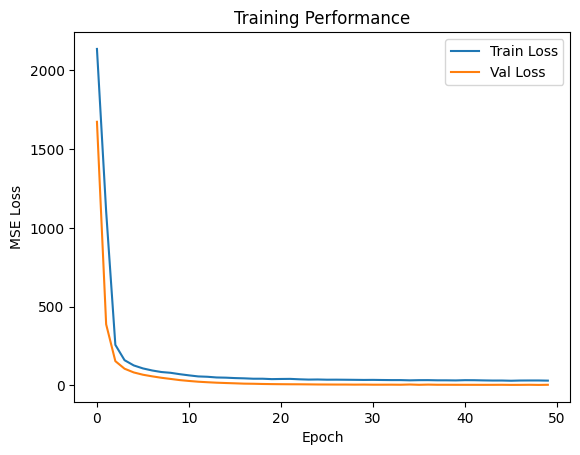

Validation MSE: 3.243 yards


In [ ]:
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Training Performance")
plt.show()

# Numeric evaluation
loss, mse = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation MSE: {mse:.3f} yards")

In [ ]:
train_mse = history.history['loss']
val_mse = history.history['val_loss']

In [ ]:
print(min(val_mse))
print(max(val_mse))

2.3536291122436523
1673.9202880859375


In [ ]:
## predict on validation set
y_pred = model.predict(X_val)
pred_df = pd.DataFrame(y_pred, columns=["x_pred", "y_pred"])
pred_df.head()


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step


,x_pred,y_pred
0,53.738251,12.563228
1,24.186693,20.633192
2,44.853794,36.316620
3,89.815392,18.778351
4,38.808712,20.494888
